In [23]:
import pandas as pd

df = pd.read_csv('CC GENERAL.csv')

# df.info()
# df.head()
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [24]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [25]:
# 檢查 MINIMUM_PAYMENTS 是空值的人，他們的 BALANCE 情況
missing_min_pay = df[df['MINIMUM_PAYMENTS'].isnull()]
print(missing_min_pay['BALANCE'].describe())

count     313.000000
mean      555.441321
std      1292.687887
min         0.000000
25%         0.187069
50%        16.848358
75%       286.686616
max      9164.724752
Name: BALANCE, dtype: float64


In [26]:
# 刪除 CREDIT_LIMIT 為空的那一行
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)


# 計算中位數 (使用中位數較不受極端值影響)
min_pay_median = df['MINIMUM_PAYMENTS'].median()

# 填補缺失值
df['MINIMUM_PAYMENTS'].fillna(min_pay_median, inplace=True)

# 再次檢查確認是否還有缺失值
print(df.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


C:\Users\peter\AppData\Local\Temp\ipykernel_38000\1490799778.py:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [27]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,845.003358,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.905284,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.452292,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


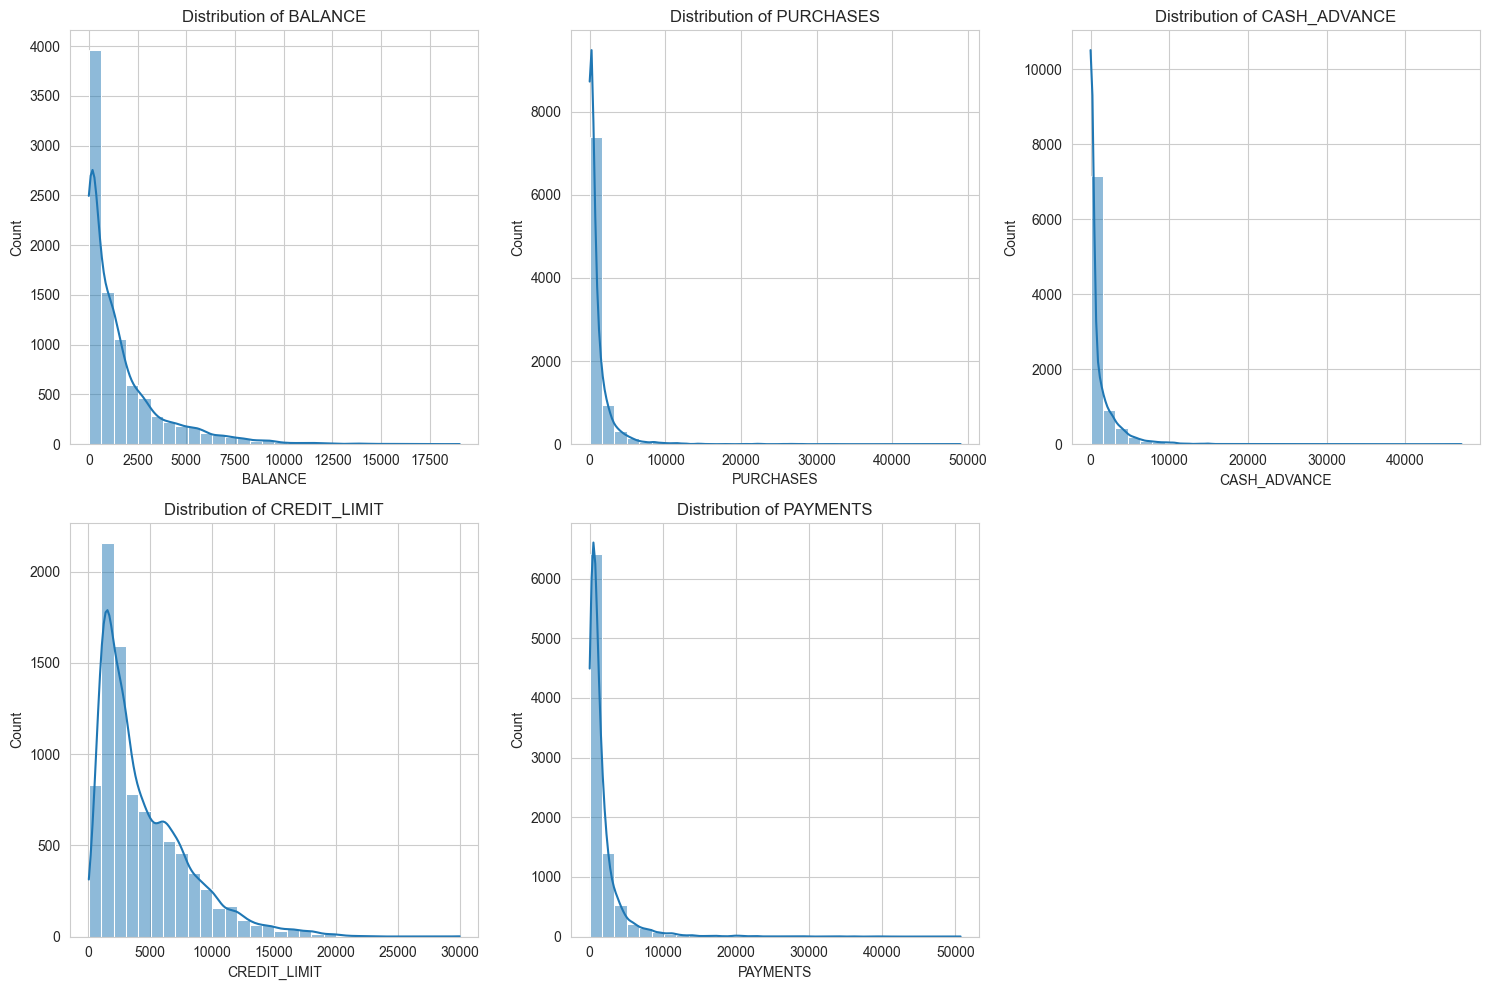

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 設定圖表風格
sns.set_style("whitegrid")

# 我們先挑幾個重點欄位來看分佈
cols_to_plot = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 3, i+1)
    kde=True #會畫出那條平滑的密度曲線
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

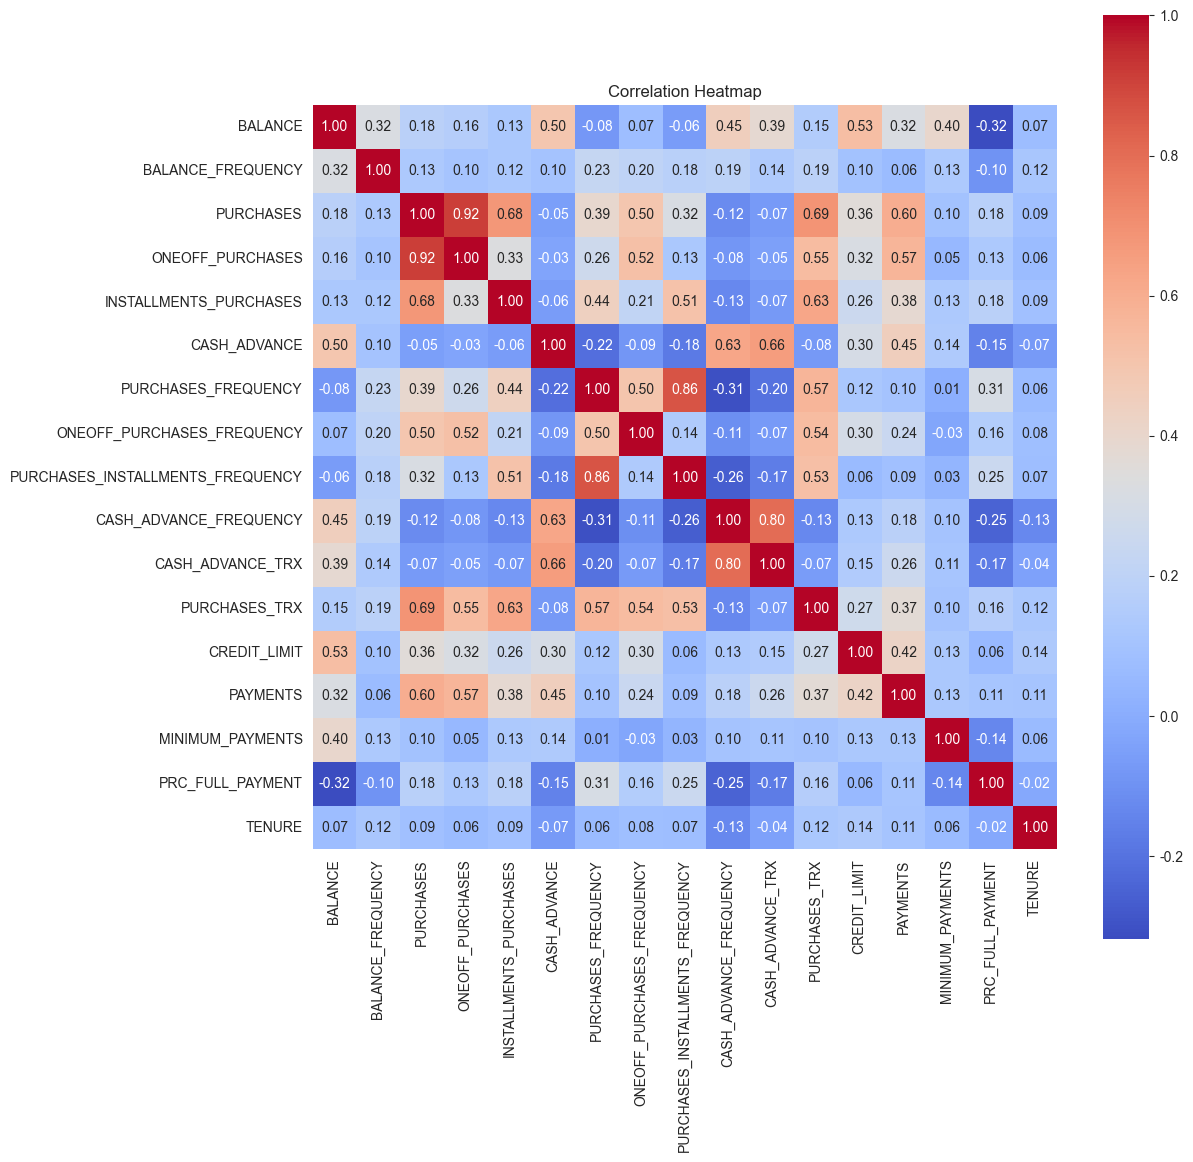

In [29]:
plt.figure(figsize=(12, 12))
# 計算相關係數矩陣
df_without_custid = df.drop(columns=['CUST_ID'])
corr_matrix = df_without_custid.corr()
# 畫出熱力圖，annot=True 會顯示數字，cmap='coolwarm' 是冷暖色調
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

# 除去 ID 欄位，因為 ID 對分群沒意義
cols_to_use = df.columns.drop('CUST_ID')

# 實例化 Scaler
scaler = StandardScaler()

# 轉換資料
df_scaled = scaler.fit_transform(df[cols_to_use])

# 轉回 DataFrame 以便查看 (這步只是為了檢查，之後建模用 array 即可)
import pandas as pd
df_scaled_df = pd.DataFrame(df_scaled, columns=cols_to_use)

print("標準化完成，現在所有欄位的 Mean 都是 0，Std 都是 1")
print(df_scaled_df.describe().round(2))

標準化完成，現在所有欄位的 Mean 都是 0，Std 都是 1
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
count  8949.00            8949.00    8949.00           8949.00   
mean      0.00               0.00       0.00             -0.00   
std       1.00               1.00       1.00              1.00   
min      -0.75              -3.71      -0.47             -0.36   
25%      -0.69               0.05      -0.45             -0.36   
50%      -0.33               0.52      -0.30             -0.33   
75%       0.24               0.52       0.05             -0.01   
max       8.40               0.52      22.48             24.20   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                 8949.00       8949.00              8949.00   
mean                     0.00         -0.00                -0.00   
std                      1.00          1.00                 1.00   
min                     -0.45         -0.47                -1.22   
25%                     -0.45   

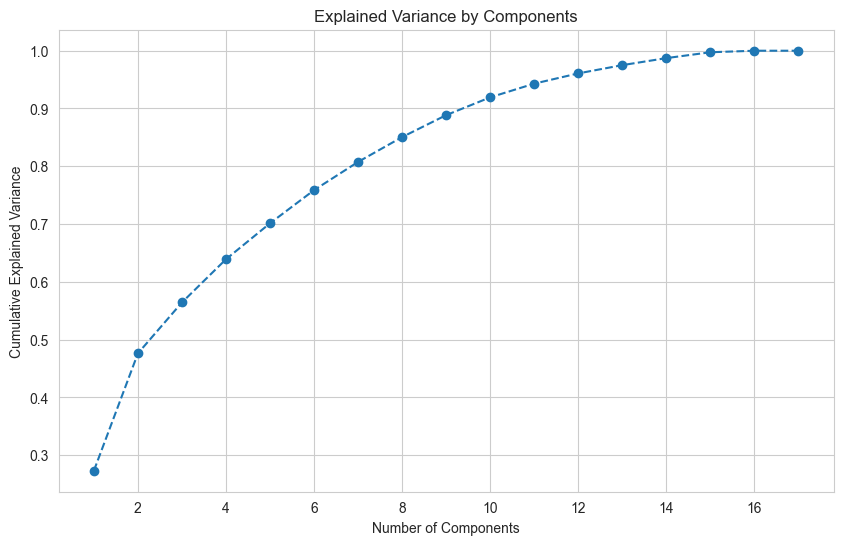

In [31]:
from sklearn.decomposition import PCA

# 我們先設定 components 為 17 (全取)，看看解釋力
pca = PCA(n_components=17)
pca.fit(df_scaled)

# 畫出解釋變異 (Explained Variance)
plt.figure(figsize=(10,6))
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

降維完成！新的資料集長相：
      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0 -1.683768 -1.072570 -0.477244  0.679144 -0.043123 -0.069705 -0.821505   
1 -1.134846  2.508738 -0.603529 -0.110178 -0.668379  1.096278  0.385953   
2  0.969060 -0.383487 -0.092648  1.236655  2.166478  0.332914  1.540257   
3 -0.888423  0.004393 -1.501618  1.073551 -0.226286  0.169366  0.236559   
4 -1.600261 -0.684049 -0.349762  1.012481  0.454576 -0.076857 -0.697249   

      PCA_8     PCA_9  
0 -0.018196  0.119090  
1  0.176700  0.675836  
2 -0.230296 -0.868963  
3 -0.690792 -0.064210  
4  0.246259  0.578784  


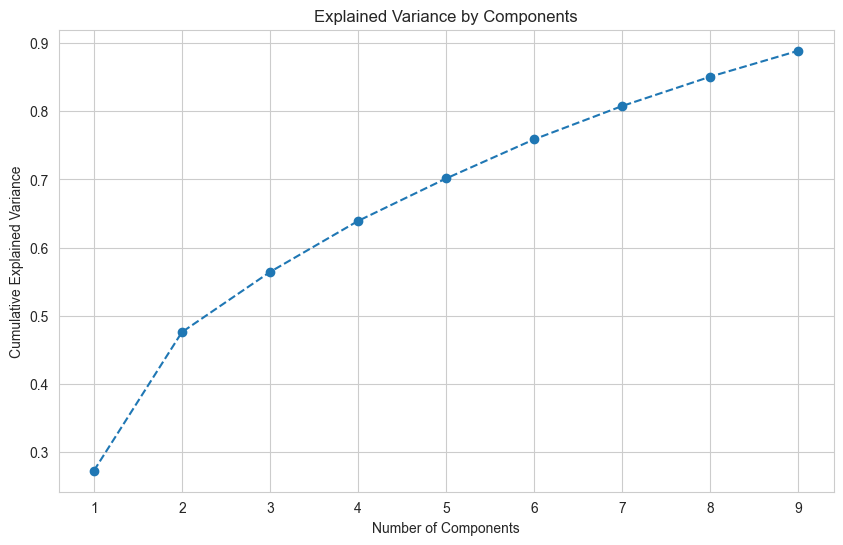

In [32]:
# 設定為 9 個主成分
pca = PCA(n_components=9)

# 執行降維
pca_data = pca.fit_transform(df_scaled)

# 為了方便後續操作，我們把它轉回 DataFrame 格式
pca_df = pd.DataFrame(pca_data, columns=[f'PCA_{i}' for i in range(1, 10)])

print("降維完成！新的資料集長相：")
print(pca_df.head())

# 畫出解釋變異 (Explained Variance)
plt.figure(figsize=(10,6))
plt.plot(range(1, 10), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

正在嘗試各種分群數量，這可能需要幾秒鐘...


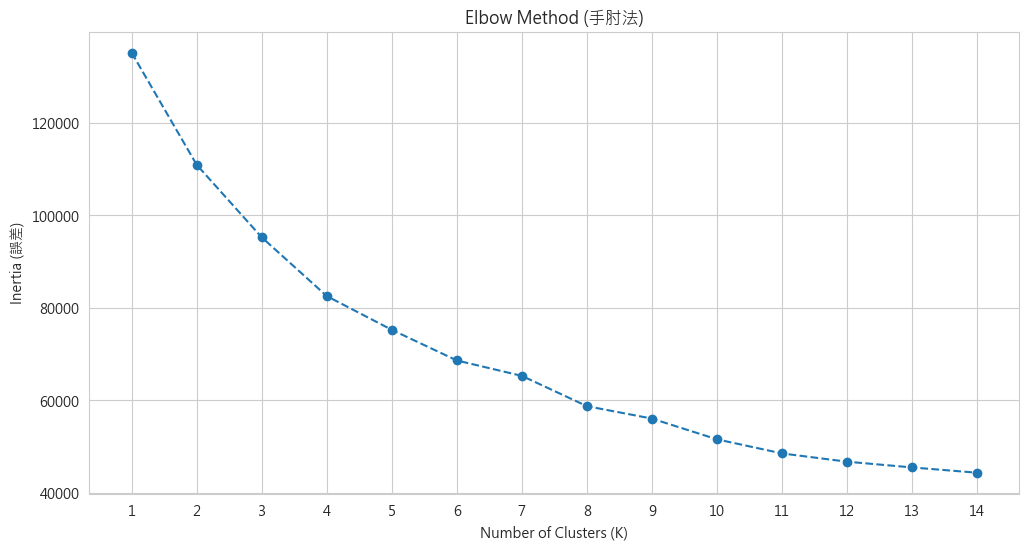

In [33]:
from sklearn.cluster import KMeans

# print(pca_df)

inertia = []
K_range = range(1, 15)  # 試著分 1 到 14 群

print("正在嘗試各種分群數量，這可能需要幾秒鐘...")

for k in K_range:
    # random_state=42 是為了確保每次跑結果一樣
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# 1. 設定中文字型：指定使用 'Microsoft JhengHei' (微軟正黑體)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

# 2. 修正負號顯示問題：
# 設定了中文字型後，負號 '-' 有時候會變成方塊，這行把它修好
plt.rcParams['axes.unicode_minus'] = False 


# 畫圖
plt.figure(figsize=(12, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method (手肘法)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (誤差)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [34]:
from sklearn.metrics import silhouette_score

# 我們針對這幾個可能的候選人來算分數
candidates = [3, 4, 5, 6, 7, 8]

print("正在計算輪廓係數 (Silhouette Score)...")

for k in candidates:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(pca_df) # 記得用降維後的資料
    score = silhouette_score(pca_df, kmeans.labels_)
    print(f"K = {k}, Silhouette Score = {score:.4f}")

正在計算輪廓係數 (Silhouette Score)...
K = 3, Silhouette Score = 0.2626
K = 4, Silhouette Score = 0.2270
K = 5, Silhouette Score = 0.2180
K = 6, Silhouette Score = 0.2309
K = 7, Silhouette Score = 0.2186
K = 8, Silhouette Score = 0.2521


In [35]:
# 1. 設定模型 K=4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# 2. 訓練並預測
# 注意：這裡我們要用 pca_df (降維後的資料)
cluster_labels = kmeans.fit_predict(pca_df)

# 3. 把標籤貼回「原始」資料集 df 和 pca_df
# 這樣我們才能看到真實的消費金額
df['Cluster'] = cluster_labels
pca_df['Cluster'] = cluster_labels

print("分群完成！已將 Cluster 標籤貼回資料表。")
print(df['Cluster'].value_counts()) # 看看每一群有多少人

分群完成！已將 Cluster 標籤貼回資料表。
Cluster
1    4085
3    3386
0    1222
2     256
Name: count, dtype: int64


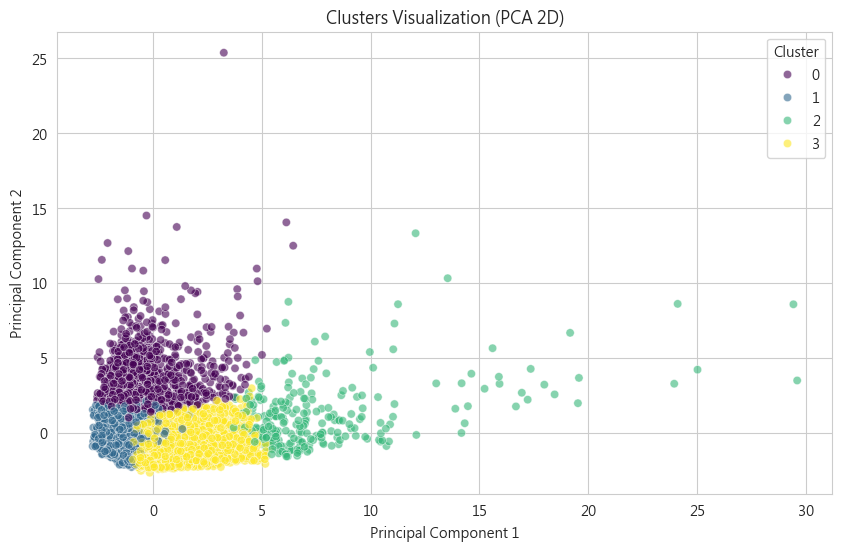

In [36]:
plt.figure(figsize=(10, 6))
# 使用 seaborn 畫散佈圖，hue='Cluster' 會自動按群組上色
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.6)
plt.title('Clusters Visualization (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [37]:
# 針對每一群，計算各個欄位的平均值
cluster_summary = df.groupby('Cluster')[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 
                                         'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES', 
                                         'CREDIT_LIMIT', 'PRC_FULL_PAYMENT']].mean()

# 為了方便閱讀，我們轉置表格，並四捨五入
print(cluster_summary.T.round(2))

Cluster                       0        1         2        3
BALANCE                 4556.54   992.80   4088.82   983.94
PURCHASES                512.59   278.22   9643.51  1401.96
CASH_ADVANCE            4490.32   571.71    786.01   217.63
INSTALLMENTS_PURCHASES   185.94    67.68   3152.63   699.43
ONEOFF_PURCHASES         326.74   210.86   6493.22   702.72
CREDIT_LIMIT            7494.32  3270.39  10543.95  4431.18
PRC_FULL_PAYMENT           0.04     0.08      0.30     0.27


In [38]:
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

# 1. 為了畫圖漂亮，我們需要把數據縮放到 0-1 之間 (因為金額大小差太多了)
# 我們只選幾個關鍵特徵來畫
features_to_plot = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 
                    'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES', 'PRC_FULL_PAYMENT']

scaler = MinMaxScaler()
df_radar = pd.DataFrame(scaler.fit_transform(df[features_to_plot]), columns=features_to_plot)
df_radar['Cluster'] = df['Cluster']

# 2. 計算每一群的平均值
radar_summary = df_radar.groupby('Cluster').mean()

# 3. 使用 Plotly 畫互動式雷達圖
fig = go.Figure()

colors = ['#FF0000', '#00FF00', '#0000FF', '#FFA500'] # 紅綠藍橘
cluster_names = ['Cluster 0: 風險變現族', 'Cluster 1: 沉睡戶', 'Cluster 2: VIP大戶', 'Cluster 3: 活躍小資']

for i in range(4):
    fig.add_trace(go.Scatterpolar(
        r=radar_summary.iloc[i].values,
        theta=features_to_plot,
        fill='toself',
        name=cluster_names[i],
        line_color=colors[i],
        opacity=0.6
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    title="銀行客戶分群雷達圖 (Customer Segmentation Radar Chart)",
    showlegend=True
)

fig.show()

In [39]:
# --- 改良版雷達圖資料準備 ---

# 1. 複製一份數據以免影響原始 df
df_radar_pre = df[features_to_plot].copy()

# 2. 關鍵步驟：去極值 (Capping)
# 我們把所有欄位超過 95% 分位數的值，都壓回 95% 的數值
# 這樣可以避免少數「超級大戶」把整個比例尺拉壞
for col in features_to_plot:
    upper_limit = df_radar_pre[col].quantile(0.95) # 找出該欄位的前 5% 門檻
    df_radar_pre[col] = df_radar_pre[col].clip(upper=upper_limit)

# 3. 再次標準化 (現在沒有極端值干擾，0-1 的分佈會更均勻)
scaler = MinMaxScaler()
df_radar = pd.DataFrame(scaler.fit_transform(df_radar_pre), columns=features_to_plot)
df_radar['Cluster'] = df['Cluster']

# 4. 計算平均值
radar_summary = df_radar.groupby('Cluster').mean()

# --- 繪圖部分 (這部分不用變，直接執行即可) ---
import plotly.graph_objects as go

fig = go.Figure()
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFA500']
cluster_names = ['Cluster 0: 風險變現族', 'Cluster 1: 沉睡戶', 'Cluster 2: VIP大戶', 'Cluster 3: 活躍小資']

for i in range(4):
    fig.add_trace(go.Scatterpolar(
        r=radar_summary.iloc[i].values,
        theta=features_to_plot,
        fill='toself',
        name=cluster_names[i],
        line_color=colors[i],
        opacity=0.6
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1] # 固定範圍，方便比較
        )),
    title="銀行客戶分群雷達圖 (優化版：去極端值)",
    showlegend=True
)

fig.show()

# =============================================================================
# 📋 商業洞察與標籤化 (Business Insight & Tagging)
# =============================================================================
# 將分群結果轉化為可執行的商業策略


In [40]:
# =============================================================================
# 🏷️ 建立客戶標籤庫 (Customer Tagging)
# =============================================================================
# 根據客戶行為特徵，自動貼上多維度標籤

def assign_tags(row):
    """
    根據客戶特徵自動分配標籤
    """
    tags = []
    
    # 1. 根據分群貼基本標籤
    cluster_tags = {
        0: ['風險變現族', '需監控'],
        1: ['沉睡戶', '需喚醒'],
        2: ['VIP', '高價值'],
        3: ['活躍小資', '成長潛力']
    }
    tags.extend(cluster_tags.get(row['Cluster'], []))
    
    # 2. 根據消費行為貼細部標籤
    if row['PURCHASES'] > 5000:
        tags.append('高消費力')
    elif row['PURCHASES'] < 500:
        tags.append('低消費')
    
    # 3. 根據套現行為貼風險標籤
    if row['CASH_ADVANCE'] > row['PURCHASES'] and row['CASH_ADVANCE'] > 1000:
        tags.append('套現傾向')
    
    # 4. 根據繳款行為貼信用標籤
    if row['PRC_FULL_PAYMENT'] > 0.5:
        tags.append('優質還款')
    elif row['PRC_FULL_PAYMENT'] < 0.1 and row['BALANCE'] > 3000:
        tags.append('循環利息戶')
    
    # 5. 根據分期行為貼偏好標籤
    if row['INSTALLMENTS_PURCHASES'] > row['ONEOFF_PURCHASES']:
        tags.append('偏好分期')
    elif row['ONEOFF_PURCHASES'] > 3000:
        tags.append('大額單筆消費')
    
    # 6. 根據信用額度貼等級標籤
    if row['CREDIT_LIMIT'] > 10000:
        tags.append('高額度')
    elif row['CREDIT_LIMIT'] < 3000:
        tags.append('低額度')
    
    return ', '.join(tags)

# 應用標籤函數
df['Tags'] = df.apply(assign_tags, axis=1)

# 顯示標籤結果
print("=== 🏷️ 客戶標籤範例 (前 10 筆) ===")
print(df[['CUST_ID', 'Cluster', 'Tags']].head(10))

# 統計各標籤出現次數
all_tags = df['Tags'].str.split(', ').explode()
print("\n=== 📊 標籤分佈統計 ===")
print(all_tags.value_counts())


=== 🏷️ 客戶標籤範例 (前 10 筆) ===
  CUST_ID  Cluster                               Tags
0  C10001        1           沉睡戶, 需喚醒, 低消費, 偏好分期, 低額度
1  C10002        0              風險變現族, 需監控, 低消費, 套現傾向
2  C10003        3                         活躍小資, 成長潛力
3  C10004        1                           沉睡戶, 需喚醒
4  C10005        1                 沉睡戶, 需喚醒, 低消費, 低額度
5  C10006        3              活躍小資, 成長潛力, 偏好分期, 低額度
6  C10007        2  VIP, 高價值, 高消費力, 優質還款, 大額單筆消費, 高額度
7  C10008        3         活躍小資, 成長潛力, 低消費, 偏好分期, 低額度
8  C10009        1                           沉睡戶, 需喚醒
9  C10010        1                      沉睡戶, 需喚醒, 高額度

=== 📊 標籤分佈統計 ===
Tags
低消費       5123
沉睡戶       4085
需喚醒       4085
低額度       3799
偏好分期      3410
活躍小資      3386
成長潛力      3386
套現傾向      2206
循環利息戶     1398
風險變現族     1222
需監控       1222
優質還款      1120
高額度        687
大額單筆消費     360
高消費力       290
高價值        256
VIP        256
Name: count, dtype: int64


=== 📋 客戶分群行銷策略總覽 ===

 Cluster  客群名稱   人數   佔比   平均消費   平均餘額                           行銷策略       預期效益
       0 風險變現族 1222 13.7  513.0 4557.0    🔴 風險監控：適度調降額度、加強套現偵測、引導正常消費     降低壞帳風險
       1   沉睡戶 4085 45.6  278.0  993.0  🟡 喚醒活動：限時回饋加碼 3%、專屬優惠推播、降級前通知 喚醒率目標 15%+
       2 VIP大戶  256  2.9 9644.0 4089.0 🟢 尊榮禮遇：機場貴賓室、旅遊刷卡 5% 回饋、專屬客服經理 維繫忠誠度、交叉銷售
       3  活躍小資 3386 37.8 1402.0  984.0 🔵 成長培育：分期 0 利率推廣、消費滿額抽獎、額度提升邀請 提升消費額 20%+


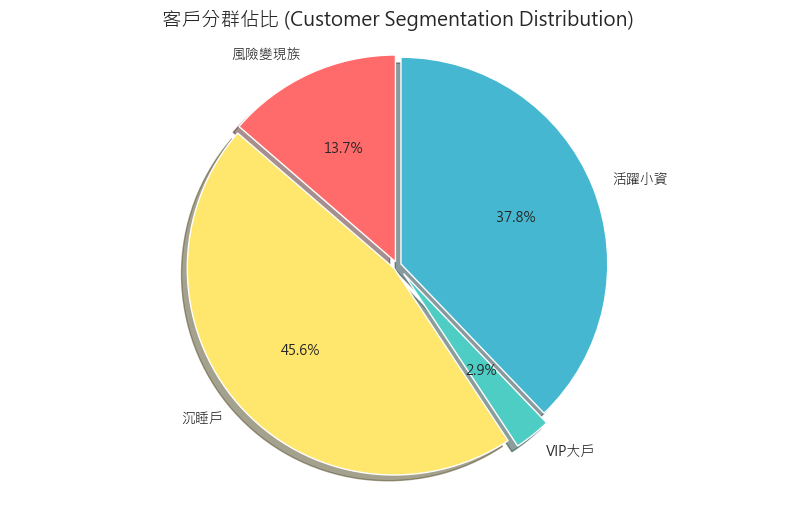

In [41]:
# =============================================================================
# 📊 行銷策略建議表 (Marketing Strategy Recommendations)
# =============================================================================
# 將分群洞察轉化為具體可執行的行銷策略

# 建立策略對照表
strategy_table = pd.DataFrame({
    'Cluster': [0, 1, 2, 3],
    '客群名稱': ['風險變現族', '沉睡戶', 'VIP大戶', '活躍小資'],
    '人數': df['Cluster'].value_counts().sort_index().values,
    '佔比': (df['Cluster'].value_counts().sort_index().values / len(df) * 100).round(1),
    '平均消費': df.groupby('Cluster')['PURCHASES'].mean().round(0).values,
    '平均餘額': df.groupby('Cluster')['BALANCE'].mean().round(0).values,
    '行銷策略': [
        '🔴 風險監控：適度調降額度、加強套現偵測、引導正常消費',
        '🟡 喚醒活動：限時回饋加碼 3%、專屬優惠推播、降級前通知',
        '🟢 尊榮禮遇：機場貴賓室、旅遊刷卡 5% 回饋、專屬客服經理',
        '🔵 成長培育：分期 0 利率推廣、消費滿額抽獎、額度提升邀請'
    ],
    '預期效益': [
        '降低壞帳風險',
        '喚醒率目標 15%+',
        '維繫忠誠度、交叉銷售',
        '提升消費額 20%+'
    ]
})

print("=== 📋 客戶分群行銷策略總覽 ===\n")
print(strategy_table.to_string(index=False))

# 視覺化：各群人數佔比
plt.figure(figsize=(10, 6))
colors_pie = ['#FF6B6B', '#FFE66D', '#4ECDC4', '#45B7D1']
cluster_names_cn = ['風險變現族', '沉睡戶', 'VIP大戶', '活躍小資']
counts = df['Cluster'].value_counts().sort_index()

plt.pie(counts, labels=cluster_names_cn, autopct='%1.1f%%', colors=colors_pie, 
        explode=[0.02, 0.02, 0.05, 0.02], shadow=True, startangle=90)
plt.title('客戶分群佔比 (Customer Segmentation Distribution)', fontsize=14)
plt.axis('equal')
plt.show()


In [42]:
# =============================================================================
# 📤 輸出行銷名單 (Export Marketing Lists)
# =============================================================================
# 將各客群名單輸出為 CSV，供業務單位使用

import os

# 建立輸出資料夾
output_folder = 'marketing_lists'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 定義各群的檔案名稱
cluster_file_names = {
    0: 'risk_monitoring_list.csv',      # 風險變現族 - 需監控
    1: 'dormant_awakening_list.csv',    # 沉睡戶 - 需喚醒
    2: 'vip_retention_list.csv',        # VIP大戶 - 尊榮維繫
    3: 'growth_potential_list.csv'      # 活躍小資 - 成長培育
}

# 輸出各群客戶名單
print("=== 📤 輸出行銷名單 ===\n")

for cluster_id, filename in cluster_file_names.items():
    # 篩選該群客戶
    cluster_df = df[df['Cluster'] == cluster_id][
        ['CUST_ID', 'Cluster', 'Tags', 'BALANCE', 'PURCHASES', 
         'CASH_ADVANCE', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT']
    ].copy()
    
    # 加入客群名稱
    cluster_names_map = {0: '風險變現族', 1: '沉睡戶', 2: 'VIP大戶', 3: '活躍小資'}
    cluster_df['客群名稱'] = cluster_names_map[cluster_id]
    
    # 儲存 CSV
    filepath = os.path.join(output_folder, filename)
    cluster_df.to_csv(filepath, index=False, encoding='utf-8-sig')
    
    print(f"✅ Cluster {cluster_id} ({cluster_names_map[cluster_id]}): {len(cluster_df):,} 人")
    print(f"   📁 已輸出至: {filepath}")
    print()

print(f"🎉 所有名單已輸出至 '{output_folder}/' 資料夾！")


=== 📤 輸出行銷名單 ===

✅ Cluster 0 (風險變現族): 1,222 人
   📁 已輸出至: marketing_lists\risk_monitoring_list.csv

✅ Cluster 1 (沉睡戶): 4,085 人
   📁 已輸出至: marketing_lists\dormant_awakening_list.csv

✅ Cluster 2 (VIP大戶): 256 人
   📁 已輸出至: marketing_lists\vip_retention_list.csv

✅ Cluster 3 (活躍小資): 3,386 人
   📁 已輸出至: marketing_lists\growth_potential_list.csv

🎉 所有名單已輸出至 'marketing_lists/' 資料夾！


In [43]:
# =============================================================================
# 🔍 深入洞察：沉睡戶喚醒機會分析
# =============================================================================
# 分析沉睡戶的特徵，找出潛在喚醒機會

dormant_customers = df[df['Cluster'] == 1]

print("=== 😴 沉睡戶深入分析 ===\n")
print(f"📊 沉睡戶總人數: {len(dormant_customers):,} 人 ({len(dormant_customers)/len(df)*100:.1f}%)")

# 分析沉睡戶中仍有高額度的客戶 (潛在喚醒目標)
high_limit_dormant = dormant_customers[dormant_customers['CREDIT_LIMIT'] > 5000]
print(f"🎯 其中高額度 (>5000) 但沉睡的客戶: {len(high_limit_dormant):,} 人")
print(f"   → 這些是優先喚醒目標！過去曾被認可有消費能力")

# 分析沉睡戶中有往來年數較長的客戶
long_tenure_dormant = dormant_customers[dormant_customers['TENURE'] >= 10]
print(f"🕐 往來超過 10 個月的沉睡戶: {len(long_tenure_dormant):,} 人")
print(f"   → 忠誠度潛力高，可能因競爭對手流失")

# 優先喚醒名單
priority_awakening = dormant_customers[
    (dormant_customers['CREDIT_LIMIT'] > 5000) & 
    (dormant_customers['TENURE'] >= 10)
]
print(f"\n⭐ 優先喚醒名單 (高額度 + 長往來): {len(priority_awakening):,} 人")

# 輸出優先喚醒名單
if len(priority_awakening) > 0:
    priority_file = os.path.join(output_folder, 'priority_awakening_list.csv')
    priority_awakening[['CUST_ID', 'Tags', 'CREDIT_LIMIT', 'TENURE', 'PURCHASES']].to_csv(
        priority_file, index=False, encoding='utf-8-sig'
    )
    print(f"   📁 已輸出至: {priority_file}")


=== 😴 沉睡戶深入分析 ===

📊 沉睡戶總人數: 4,085 人 (45.6%)
🎯 其中高額度 (>5000) 但沉睡的客戶: 722 人
   → 這些是優先喚醒目標！過去曾被認可有消費能力
🕐 往來超過 10 個月的沉睡戶: 3,676 人
   → 忠誠度潛力高，可能因競爭對手流失

⭐ 優先喚醒名單 (高額度 + 長往來): 697 人
   📁 已輸出至: marketing_lists\priority_awakening_list.csv


In [44]:
# =============================================================================
# 🔍 深入洞察：VIP 大戶消費偏好分析
# =============================================================================
# 分析 VIP 的消費特徵，識別交叉銷售機會

vip_customers = df[df['Cluster'] == 2]

print("=== 🏆 VIP 大戶深入分析 ===\n")
print(f"📊 VIP 總人數: {len(vip_customers):,} 人 ({len(vip_customers)/len(df)*100:.1f}%)")
print(f"💰 平均消費金額: ${vip_customers['PURCHASES'].mean():,.0f}")
print(f"💳 平均信用額度: ${vip_customers['CREDIT_LIMIT'].mean():,.0f}")
print(f"✅ 平均全額繳款率: {vip_customers['PRC_FULL_PAYMENT'].mean()*100:.1f}%")

# 分析 VIP 的消費偏好
vip_installment = vip_customers[vip_customers['INSTALLMENTS_PURCHASES'] > vip_customers['ONEOFF_PURCHASES']]
vip_oneoff = vip_customers[vip_customers['ONEOFF_PURCHASES'] > vip_customers['INSTALLMENTS_PURCHASES']]

print(f"\n📈 消費偏好分析:")
print(f"   偏好分期付款: {len(vip_installment)} 人 ({len(vip_installment)/len(vip_customers)*100:.1f}%)")
print(f"   偏好單筆消費: {len(vip_oneoff)} 人 ({len(vip_oneoff)/len(vip_customers)*100:.1f}%)")

# 識別超級 VIP (消費 > 10000)
super_vip = vip_customers[vip_customers['PURCHASES'] > 10000]
print(f"\n⭐ 超級 VIP (消費 > $10,000): {len(super_vip)} 人")
print(f"   → 建議：專屬客服經理、優先邀請高端活動")

# 輸出超級 VIP 名單
if len(super_vip) > 0:
    super_vip_file = os.path.join(output_folder, 'super_vip_list.csv')
    super_vip[['CUST_ID', 'Tags', 'PURCHASES', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT']].to_csv(
        super_vip_file, index=False, encoding='utf-8-sig'
    )
    print(f"   📁 已輸出至: {super_vip_file}")


=== 🏆 VIP 大戶深入分析 ===

📊 VIP 總人數: 256 人 (2.9%)
💰 平均消費金額: $9,644
💳 平均信用額度: $10,544
✅ 平均全額繳款率: 30.3%

📈 消費偏好分析:
   偏好分期付款: 72 人 (28.1%)
   偏好單筆消費: 184 人 (71.9%)

⭐ 超級 VIP (消費 > $10,000): 70 人
   → 建議：專屬客服經理、優先邀請高端活動
   📁 已輸出至: marketing_lists\super_vip_list.csv


In [45]:
# =============================================================================
# 📋 專案總結 (Project Summary)
# =============================================================================

print("=" * 60)
print("🎯 客戶分群專案總結 (Customer Segmentation Summary)")
print("=" * 60)

print("\n📊 【分群結果】")
for cluster_id in range(4):
    cluster_names_map = {0: '風險變現族', 1: '沉睡戶', 2: 'VIP大戶', 3: '活躍小資'}
    count = len(df[df['Cluster'] == cluster_id])
    pct = count / len(df) * 100
    print(f"   Cluster {cluster_id} ({cluster_names_map[cluster_id]}): {count:,} 人 ({pct:.1f}%)")

print("\n🏷️ 【標籤系統】")
print(f"   已建立 {len(all_tags.unique())} 種標籤")
print(f"   每位客戶平均擁有 {df['Tags'].str.count(',').mean() + 1:.1f} 個標籤")

print("\n📤 【輸出名單】")
import os
if os.path.exists(output_folder):
    files = os.listdir(output_folder)
    print(f"   已輸出 {len(files)} 份行銷名單至 '{output_folder}/' 資料夾:")
    for f in files:
        print(f"   ├── {f}")

print("\n✅ 【達成目標】")
print("   ✓ RFM 類分群模型建構 (K-Means)")
print("   ✓ 商業洞察與客戶標籤化")
print("   ✓ 行銷策略建議表")
print("   ✓ 可執行行銷名單輸出")

print("\n🚀 【下一步建議】")
print("   1. 將名單導入 CRM 系統")
print("   2. 設計 A/B 測試驗證策略效果")
print("   3. 建立定期更新機制 (每月/每季)")
print("   4. 追蹤轉換率與 ROI")
print("=" * 60)


🎯 客戶分群專案總結 (Customer Segmentation Summary)

📊 【分群結果】
   Cluster 0 (風險變現族): 1,222 人 (13.7%)
   Cluster 1 (沉睡戶): 4,085 人 (45.6%)
   Cluster 2 (VIP大戶): 256 人 (2.9%)
   Cluster 3 (活躍小資): 3,386 人 (37.8%)

🏷️ 【標籤系統】
   已建立 17 種標籤
   每位客戶平均擁有 4.1 個標籤

📤 【輸出名單】
   已輸出 6 份行銷名單至 'marketing_lists/' 資料夾:
   ├── dormant_awakening_list.csv
   ├── growth_potential_list.csv
   ├── priority_awakening_list.csv
   ├── risk_monitoring_list.csv
   ├── super_vip_list.csv
   ├── vip_retention_list.csv

✅ 【達成目標】
   ✓ RFM 類分群模型建構 (K-Means)
   ✓ 商業洞察與客戶標籤化
   ✓ 行銷策略建議表
   ✓ 可執行行銷名單輸出

🚀 【下一步建議】
   1. 將名單導入 CRM 系統
   2. 設計 A/B 測試驗證策略效果
   3. 建立定期更新機制 (每月/每季)
   4. 追蹤轉換率與 ROI
